#### Modelo Supervisado

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image as PImage

In [162]:
DTA = pd.read_csv("train.csv")

In [163]:
DTAU = DTA.loc[:,["TotRmsAbvGrd","GarageArea", "GarageCars","OverallCond","PoolArea","OverallQual","LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "TotRmsAbvGrd", "Fireplaces", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "SalePrice"]]

#### Limpieza de datos

In [164]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
DTAU_F = clean_dataset(DTAU)

In [165]:
DTAU_F.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Creación de variable binaria
#### Se crea una varaiable binaria basada en la variable SalePrice, donde si el valor es mayor a 214000.000000 equivale a 1 y si el valor es menor equivale a 0

In [166]:
DTAU_F["SalePriceBinary"] = np.where(DTAU_F['SalePrice']>214000.000000 , 1, 0)
DTAU_F.SalePriceBinary.describe()

count    1460.000000
mean        0.247945
std         0.431968
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SalePriceBinary, dtype: float64

In [167]:
y_train = DTAU_F['SalePriceBinary'].astype("int")
x_train = DTA.loc[:,["TotRmsAbvGrd","GarageArea", "GarageCars","OverallCond","PoolArea","OverallQual","LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "TotRmsAbvGrd", "Fireplaces", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]]

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image as PImage
from sklearn.linear_model import LinearRegression

In [169]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 2,
                                            class_weight="balanced")
tree = decision_tree.fit(x_train, y_train)

In [170]:
confusion_matrix(y_train, tree.predict(x_train))

array([[876, 222],
       [ 36, 326]], dtype=int64)

### Metricas de la Matriz de confusion

##### Accuracy 

In [181]:
(876+326)/(876+36+326+222)

0.8232876712328767

##### Especificidad

In [177]:
(876)/(876+222)

0.7978142076502732

##### Sensitividad

In [178]:
(326)/(326+36)

0.9005524861878453

##### Valor predicitivo positivo ( Recall)

In [179]:
(326)/(326+222)

0.5948905109489051

##### Valor predicitivo Negativo ( Presicion)

In [180]:
876/(876+36)

0.9605263157894737

##### Curva ROC

In [172]:
probas = tree.predict_proba(x_train)

In [173]:
from sklearn.metrics import roc_curve, auc

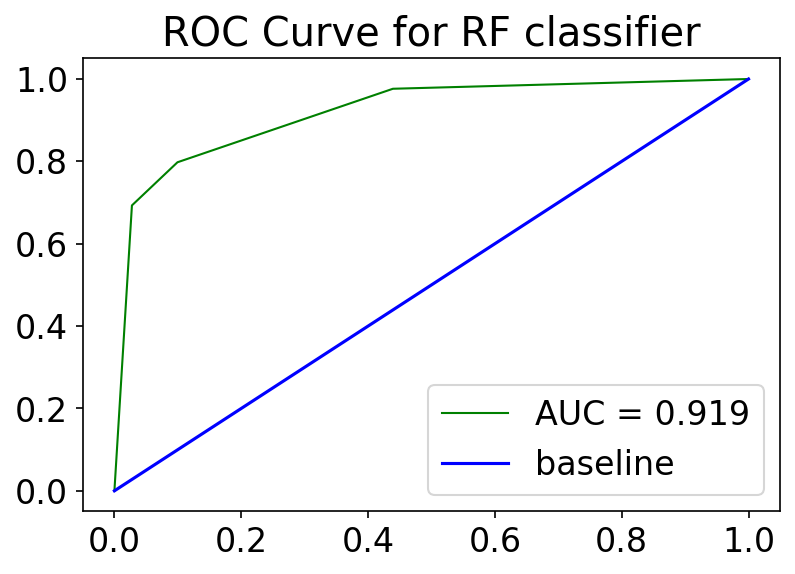

In [174]:
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_train, probas[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(y_train, [1 for _ in range(len(y_train))])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.rcParams['font.size'] = 16
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

### Conclusiones

#### La grafica muestra con la linea AUC que el modelo diseñado es muy confiable ya que llega a 0.919, lo que significa que la variable binaria que se creó (SalePriceBinary) para comparar con las demas variables del modelo, es bien entendida en su parte positiva y neagativa par el grafico de Curva ROC.

#### Con respecto a las variables Recall y presicion se puede ver que el modelo diseñado tiene un performance muy bueno con respecto a la predicción en la parte negativa, y un performance aceptable con respecto a la parte positiva. Esto se representa muy bien en la grafica de Curva ROC.